In [1]:
! pip install yfinance --break-system-packages

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 30.0 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
Using cached beautifulsoup4-4.14.2-py3-none-any.whl (106 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 81.8 MB/s  0:00:00
Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl (427 kB)
Using cached soupsieve-2.8-py3-none-any.whl (36 kB)
Using cached pycparser-2.23-py3-none-any.whl (118 kB)
  Created wheel for multitasking: filenam

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [8]:
### Loading stock price data using yfinance
import yfinance as yf
import pandas as pd
import numpy as np

# Download stock data (using Apple as example - you can change ticker)
ticker = 'AAPL'  # Change this to any stock ticker you want
start_date = '2015-01-01'
end_date = '2024-01-01'

print(f"Downloading {ticker} stock data from {start_date} to {end_date}...")

# Download the data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Extract just the Close price column and create a DataFrame
data = pd.DataFrame(stock_data['Close'])
data.columns = ['Close Price']  # Rename column for clarity

# IMPORTANT: Fill in missing dates (weekends/holidays) for continuous time series
# Create a complete date range
complete_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

# Reindex to include all dates and forward-fill missing values
data = data.reindex(complete_date_range)
data = data.fillna(method='ffill')  # Forward fill: use last known price for weekends/holidays

# Convert to period index (daily frequency) - AFTER filling gaps
data.index = data.index.to_period('D')

# Display information
print(f"\nData shape: {data.shape}")
print(f"Date range: {data.index[0]} to {data.index[-1]}")
print(f"Missing values: {data.isnull().sum().sum()}")
print("\nFirst few rows:")
print(data.head())
print("\nLast few rows:")
print(data.tail())

[*********************100%***********************]  1 of 1 completed


Data shape: (3284, 1)
Date range: 2015-01-02 to 2023-12-29
Missing values: 0

First few rows:
            Close Price
2015-01-02    24.261049
2015-01-03    24.261049
2015-01-04    24.261049
2015-01-05    23.577574
2015-01-06    23.579800

Last few rows:
            Close Price
2023-12-25   191.974686
2023-12-26   191.429306
2023-12-27   191.528458
2023-12-28   191.954849
2023-12-29   190.913651


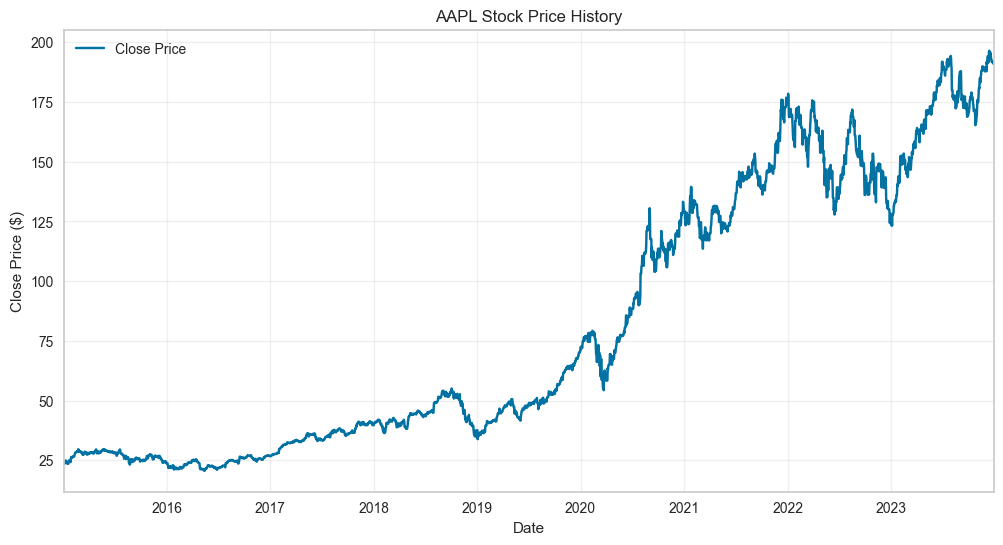

In [9]:
# plot the stock price data
import matplotlib.pyplot as plt

data.plot(figsize=(12, 6), title=f'{ticker} Stock Price History', ylabel='Close Price ($)', xlabel='Date')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
from pycaret.time_series import *

# Setup for stock price forecasting
exp = setup(
    data, 
    target='Close Price',  # This MUST match the column name you created in Cell 2
    fh=30,                 # Forecast horizon: 30 days ahead
    fold=5,                # Number of cross-validation folds
    session_id=123,        # For reproducibility
    seasonal_period=[5, 7],  # Try weekly patterns (5 trading days, 7 calendar days)
    num_sps_to_use=1,      # Use only 1 seasonal period
)

,Description,Value
0,session_id,123
1,Target,Close Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3284, 1)"
5,Transformed data shape,"(3284, 1)"
6,Transformed train set shape,"(3254, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [11]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [12]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [13]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Close Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3284, 1)"
5,Transformed data shape,"(3284, 1)"
6,Transformed train set shape,"(3281, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [14]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,3284.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,81.399857
3,Summary,Statistics,Transformed,Median,,51.270494
4,Summary,Statistics,Transformed,Standard Deviation,,56.022811
5,Summary,Statistics,Transformed,Variance,,3138.55534
6,Summary,Statistics,Transformed,Kurtosis,,-1.308765
7,Summary,Statistics,Transformed,Skewness,,0.54358
8,Summary,Statistics,Transformed,# Distinct Values,,2233.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",77041.983587


In [15]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,4.2301,2.8529,8.1622,8.8561,0.0452,0.0452,-3.7433,0.2780
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,4.5393,3.0551,8.7776,9.5013,0.0490,0.0488,-3.5891,0.0960
stlf,STLF,4.6411,3.1106,8.9674,9.6657,0.0499,0.0497,-4.1514,0.0140
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,4.6455,3.1297,8.9782,9.7294,0.0501,0.0498,-3.8144,0.0980
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,4.6470,3.1315,8.9812,9.7352,0.0501,0.0499,-3.8165,0.3800
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,4.6743,3.1548,9.0312,9.8056,0.0505,0.0500,-3.8763,0.3400
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,4.7529,3.1922,9.1849,9.9227,0.0512,0.0510,-4.0416,0.1000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,4.7626,3.2070,9.2017,9.9674,0.0514,0.0510,-4.0696,0.0540
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,4.8030,3.2387,9.2777,10.0644,0.0519,0.0513,-4.1586,0.1160
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,4.8050,3.2323,9.2832,10.0456,0.0518,0.0514,-4.1733,0.1220


In [16]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.2109,0.1635,0.7128,0.8301,0.0037,0.0037,-1.1400,0.1100
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.2272,0.1845,0.7679,0.9367,0.0040,0.0040,-1.6861,0.1000
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2344,0.1818,0.7924,0.9232,0.0041,0.0041,-1.7382,0.2000
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2436,0.1836,0.8235,0.9323,0.0043,0.0042,-1.5052,0.2800
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2475,0.1862,0.8367,0.9454,0.0043,0.0043,-2.4736,0.0633
naive,Naive Forecaster,0.2676,0.2094,0.9046,1.0632,0.0047,0.0047,-2.4130,0.0133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2841,0.2157,0.9603,1.0950,0.0050,0.0050,-4.3906,0.5600
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.2852,0.2128,0.9641,1.0807,0.0050,0.0050,-2.5133,0.0300
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.2868,0.2125,0.9695,1.0791,0.0050,0.0050,-2.5039,0.0300
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.2973,0.2232,1.0050,1.1331,0.0052,0.0052,-2.8077,0.0267


BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                    sp=13, window_length=13)

In [17]:
# plot forecast
plot_model(best, plot = 'forecast')

In [18]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [19]:
# residuals plot
plot_model(best, plot = 'residuals')

In [20]:
# check docstring to see available plots
# help(plot_model)

In [21]:
# predict on test set
holdout_pred = predict_model(best)

In [22]:
# show predictions df
holdout_pred.head()

,y_pred
2023-11-30,186.5335
2023-12-01,186.5335
2023-12-02,186.5335
2023-12-03,186.5335
2023-12-04,186.5335


In [23]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
2023-11-30,186.5335
2023-12-01,186.5335
2023-12-02,186.5335
2023-12-03,186.5335
2023-12-04,186.5335
2023-12-05,186.5335
2023-12-06,186.5335
2023-12-07,186.5335
2023-12-08,186.5335
2023-12-09,186.5335


In [24]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 Croston())]))]),
 'my_first_pipeline.pkl')

In [25]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                Croston())]))])

In [26]:
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Close Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3284, 1)"
5,Transformed data shape,"(3284, 1)"
6,Transformed train set shape,"(3281, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [27]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'all_sps_to_use',
 'approach_type',
 'candidate_sps',
 'data',
 'dataset',
 'dataset_transformed',
 'enforce_exogenous',
 'enforce_pi',
 'exogenous_present',
 'exp_id',
 'exp_name_log',
 'fh',
 'fold_generator',
 'fold_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'index_type',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'model_engines',
 'n_jobs_param',
 'pipeline',
 'primary_sp_to_use',
 'seasonality_present',
 'seed',
 'significant_sps',
 'significant_sps_no_harmonics',
 'strictly_positive',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [28]:
# lets access y_train_transformed
get_config('y_train_transformed')

2015-01-02     24.261049
2015-01-03     24.261049
2015-01-04     24.261049
2015-01-05     23.577574
2015-01-06     23.579800
                 ...    
2023-12-22    191.974686
2023-12-23    191.974686
2023-12-24    191.974686
2023-12-25    191.974686
2023-12-26    191.429306
Freq: D, Name: Close Price, Length: 3281, dtype: float64

In [29]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [30]:
# help(setup)

In [31]:
# init setup fold_strategy = expanding
s = setup(data, fh = 3, session_id = 123,
          fold_strategy = 'expanding', numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,Close Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3284, 1)"
5,Transformed data shape,"(3284, 1)"
6,Transformed train set shape,"(3281, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.2109,0.1635,0.7128,0.8301,0.0037,0.0037,-1.1400,0.1133
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.2272,0.1845,0.7679,0.9367,0.0040,0.0040,-1.6861,0.1100
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2344,0.1818,0.7924,0.9232,0.0041,0.0041,-1.7382,0.2067
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2436,0.1836,0.8235,0.9323,0.0043,0.0042,-1.5052,0.2867
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2475,0.1862,0.8367,0.9454,0.0043,0.0043,-2.4736,0.0900
naive,Naive Forecaster,0.2676,0.2094,0.9046,1.0632,0.0047,0.0047,-2.4130,0.0167
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2841,0.2157,0.9603,1.0950,0.0050,0.0050,-4.3906,0.5500
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.2852,0.2128,0.9641,1.0807,0.0050,0.0050,-2.5133,0.5833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.2868,0.2125,0.9695,1.0791,0.0050,0.0050,-2.5039,0.0633
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.2973,0.2232,1.0050,1.1331,0.0052,0.0052,-2.8077,0.0367


In [33]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [34]:
compare_ts_models = compare_models(include = ['ets', 'arima', 'theta', 'naive', 'snaive', 'grand_means', 'polytrend'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.2676,0.2094,0.9046,1.0632,0.0047,0.0047,-2.4130,0.0167
theta,Theta Forecaster,0.3571,0.2619,1.2073,1.3298,0.0062,0.0062,-4.2669,0.0200
ets,ETS,0.3964,0.2862,1.3402,1.4531,0.0069,0.0069,-5.3091,0.1267
snaive,Seasonal Naive Forecaster,0.6304,0.5066,2.1309,2.5718,0.0110,0.0110,-49.6050,0.0233
arima,ARIMA,0.8704,0.6192,2.9422,3.1435,0.0152,0.0151,-44.9409,0.1267
polytrend,Polynomial Trend Forecaster,6.2530,4.1650,21.1355,21.1442,0.1096,0.1160,-2793.6860,0.0167
grand_means,Grand Means Forecaster,33.0453,22.0019,111.6933,111.6948,0.5793,0.8156,-83725.0657,0.0167


In [35]:
compare_ts_models

NaiveForecaster()

In [36]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.2676,0.2094,0.9046,1.0632,0.0047,0.0047,-2.413,0.0167
theta,Theta Forecaster,0.3571,0.2619,1.2073,1.3298,0.0062,0.0062,-4.2669,0.0200
ets,ETS,0.3964,0.2862,1.3402,1.4531,0.0069,0.0069,-5.3091,0.1267
snaive,Seasonal Naive Forecaster,0.6304,0.5066,2.1309,2.5718,0.011,0.011,-49.605,0.0233
arima,ARIMA,0.8704,0.6192,2.9422,3.1435,0.0152,0.0151,-44.9409,0.1267
polytrend,Polynomial Trend Forecaster,6.253,4.165,21.1355,21.1442,0.1096,0.116,-2793.686,0.0167
grand_means,Grand Means Forecaster,33.0453,22.0019,111.6933,111.6948,0.5793,0.8156,-83725.0657,0.0167


In [37]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.2109,0.1635,0.7128,0.8301,0.0037,0.0037,-1.1400,0.1133
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2436,0.1836,0.8235,0.9323,0.0043,0.0042,-1.5052,0.2867
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.2272,0.1845,0.7679,0.9367,0.0040,0.0040,-1.6861,0.1067
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2344,0.1818,0.7924,0.9232,0.0041,0.0041,-1.7382,0.2133
naive,Naive Forecaster,0.2676,0.2094,0.9046,1.0632,0.0047,0.0047,-2.4130,0.0200
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2475,0.1862,0.8367,0.9454,0.0043,0.0043,-2.4736,0.0733
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.2868,0.2125,0.9695,1.0791,0.0050,0.0050,-2.5039,0.0367
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.2852,0.2128,0.9641,1.0807,0.0050,0.0050,-2.5133,0.5967
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.2973,0.2232,1.0050,1.1331,0.0052,0.0052,-2.8077,0.0567
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.3072,0.2271,1.0385,1.1531,0.0054,0.0054,-2.9576,0.0400


In [38]:
# list of top 3 models by MAE
best_mae_models_top3

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                         11, 10,
                                                                         9, 8, 7,
                                                                         6, 5, 4,
                                                                         3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                     sp=13, window_length=13),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                         11, 10,
                                                                         9, 8, 7,
                                                                         6, 5, 4,

In [39]:
# help(compare_models)

In [40]:
# check stats on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,3284.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,81.399857
3,Summary,Statistics,Transformed,Median,,51.270494
4,Summary,Statistics,Transformed,Standard Deviation,,56.022811
5,Summary,Statistics,Transformed,Variance,,3138.55534
6,Summary,Statistics,Transformed,Kurtosis,,-1.308765
7,Summary,Statistics,Transformed,Skewness,,0.54358
8,Summary,Statistics,Transformed,# Distinct Values,,2233.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",77041.983587


In [41]:
# check_stats on residuals of best model
check_stats(estimator = best)

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [42]:
# from pycaret.time_series import *
# s = setup(data, fh = 3, session_id = 123, log_experiment='mlflow', experiment_name='airline_experiment')

In [43]:
# compare models
# best = compare_models()

In [44]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [45]:
# help(setup)

In [46]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [47]:
# train ets with default fold=3
ets = create_model('ets')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.7476,0.5157,2.5275,2.6189,0.0130,0.0129,-8.4004
1,2023-12-20,0.3754,0.2857,1.2691,1.4506,0.0066,0.0066,-7.2561
2,2023-12-23,0.0663,0.0571,0.2239,0.2898,0.0012,0.0012,-0.2707
Mean,NaT,0.3964,0.2862,1.3402,1.4531,0.0069,0.0069,-5.3091
SD,NaT,0.2785,0.1872,0.9418,0.9509,0.0048,0.0048,3.5932


In [48]:
ets_results = pull()
print(type(ets_results))
ets_results

<class 'pandas.core.frame.DataFrame'>


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.7476,0.5157,2.5275,2.6189,0.0130,0.0129,-8.4004
1,2023-12-20,0.3754,0.2857,1.2691,1.4506,0.0066,0.0066,-7.2561
2,2023-12-23,0.0663,0.0571,0.2239,0.2898,0.0012,0.0012,-0.2707
Mean,NaT,0.3964,0.2862,1.3402,1.4531,0.0069,0.0069,-5.3091
SD,NaT,0.2785,0.1872,0.9418,0.9509,0.0048,0.0048,3.5932


In [49]:
# train theta model with fold=5
theta = create_model('theta', fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-11,1.0606,0.7806,3.5792,3.9611,0.0183,0.0185,-5.4853
1,2023-12-14,0.0655,0.0519,0.2213,0.2634,0.0011,0.0011,0.0000
2,2023-12-17,0.6665,0.4706,2.2534,2.3899,0.0116,0.0115,-6.8280
3,2023-12-20,0.3346,0.2525,1.1312,1.2821,0.0059,0.0059,-5.4496
4,2023-12-23,0.0702,0.0625,0.2372,0.3173,0.0012,0.0012,-0.5232
Mean,NaT,0.4395,0.3236,1.4844,1.6428,0.0076,0.0076,-3.6572
SD,NaT,0.3807,0.2748,1.2849,1.3945,0.0066,0.0066,2.8216


In [50]:
# train theta with specific model parameters
create_model('theta', deseasonalize = False, fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-11,1.0403,0.7552,3.5109,3.8320,0.0179,0.0181,-5.0693
1,2023-12-14,0.1791,0.1193,0.6050,0.6055,0.0031,0.0031,0.0000
2,2023-12-17,0.5186,0.3851,1.7535,1.9555,0.0090,0.0090,-4.2412
3,2023-12-20,0.3093,0.2304,1.0456,1.1698,0.0054,0.0054,-4.3691
4,2023-12-23,0.0795,0.0760,0.2686,0.3858,0.0014,0.0014,-1.2515
Mean,NaT,0.4254,0.3132,1.4367,1.5897,0.0074,0.0074,-2.9862
SD,NaT,0.3408,0.2454,1.1499,1.2455,0.0059,0.0059,1.9877


ThetaForecaster(deseasonalize=False, sp=13)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs

You can check the docstring of the function for more info.

In [51]:
# help(create_model)

In [52]:
# train a dt model with default params
dt = create_model('dt_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.5605,0.3852,1.8951,1.9562,0.0098,0.0097,-4.2446
1,2023-12-20,0.7833,0.5217,2.6477,2.6484,0.0138,0.0137,-26.5217
2,2023-12-23,0.0552,0.0415,0.1866,0.2104,0.0010,0.0010,0.3304
Mean,NaT,0.4663,0.3161,1.5765,1.6050,0.0082,0.0081,-10.1453
SD,NaT,0.3046,0.2020,1.0297,1.0258,0.0053,0.0053,11.7295


In [53]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.1944,0.1595,0.6572,0.8102,0.0034,0.0034,0.1003
1,2023-12-20,0.5766,0.4008,1.9490,2.0348,0.0101,0.0101,-15.2463
2,2023-12-23,0.2223,0.1596,0.7513,0.8101,0.0039,0.0039,-8.9293
Mean,NaT,0.3311,0.2400,1.1192,1.2184,0.0058,0.0058,-8.0251
SD,NaT,0.1740,0.1137,0.5881,0.5773,0.0031,0.0030,6.2977


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


In [54]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(random_state=123), sp=13,
                    window_length=13)

In [55]:
# define tuning grid
dt_grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.2312,0.1884,0.7816,0.9567,0.0040,0.0040,-0.2545
1,2023-12-20,0.2139,0.1517,0.7231,0.7702,0.0038,0.0038,-1.3277
2,2023-12-23,0.0909,0.0631,0.3070,0.3202,0.0016,0.0016,-0.5511
Mean,NaT,0.1787,0.1344,0.6039,0.6824,0.0031,0.0031,-0.7111
SD,NaT,0.0625,0.0526,0.2113,0.2672,0.0011,0.0011,0.4525


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  21 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished


In [56]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(max_depth=6, random_state=123),
                    sp=13, window_length=13)

In [57]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.1944,0.1595,0.6572,0.8102,0.0034,0.0034,0.1003
1,2023-12-20,0.5766,0.4008,1.9490,2.0348,0.0101,0.0101,-15.2463
2,2023-12-23,0.2223,0.1596,0.7513,0.8101,0.0039,0.0039,-8.9293
Mean,NaT,0.3311,0.2400,1.1192,1.2184,0.0058,0.0058,-8.0251
SD,NaT,0.1740,0.1137,0.5881,0.5773,0.0031,0.0030,6.2977


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


In [58]:
# model object
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='sqrt',
                      min_impurity_decrease=2.7551712836016713e-05,
                      min_samples_leaf=3, min_samples_split=4,
                      random_state=123),
                    sp=26, window_length=24)

In [59]:
# tuner object
tuner

In [60]:
# help(tune_model)

In [61]:
# top 3 models based on mae
best_mae_models_top3

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                         11, 10,
                                                                         9, 8, 7,
                                                                         6, 5, 4,
                                                                         3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                     sp=13, window_length=13),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                         11, 10,
                                                                         9, 8, 7,
                                                                         6, 5, 4,

In [62]:
# blend top 3 models
blend_models(best_mae_models_top3)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-12-17,0.2662,0.1932,0.9001,0.9810,0.0046,0.0046,-0.3190
1,2023-12-20,0.1288,0.0939,0.4353,0.4769,0.0023,0.0023,0.1075
2,2023-12-23,0.0537,0.0524,0.1815,0.2661,0.0009,0.0009,-0.0717
Mean,NaT,0.1496,0.1132,0.5056,0.5747,0.0026,0.0026,-0.0944
SD,NaT,0.0880,0.0590,0.2975,0.2999,0.0015,0.0015,0.1748


EnsembleForecaster(forecasters=[('ExtraTreesRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13,
                                                                                                         12,
                                                                                                         11,
                                                                                                         10,
                                                                                                         9,
                                                                                                         8,
                                                                                                         7,
                                                                                                         6,
                                                                                                         5,
                                                                                                         4,
                                                                                                         3,
                                                                                                         2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                                                     sp=13, window_length=13)),
                                ('GradientBoostingRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13,
                                                                                                         12,
                                                                                                         11,
                                                                                                         10,
                                                                                                         9,
                                                                                                         8,
                                                                                                         7,
                                                                                                         6,
                                                                                                         5,
                                                                                                         4,
                                                                                                         3,
                                                                                                         2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=GradientBoostingRegressor(random_state=123),
                                                     sp=13, window_length=13)),
                                ('AdaBoostRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13,
                                                                                                         12,
                                                                                                         11,
                                                                                                         10,

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- optimize

You can check the docstring of the function for more info.

In [63]:
# help(blend_models)

In [64]:
# plot forecast
plot_model(best, plot = 'forecast')

In [65]:
# plot acf
# for certain plots you don't need a trained model
plot_model(plot = 'acf')

In [66]:
# plot diagnostics
# for certain plots you don't need a trained model
plot_model(plot = 'diagnostics')

In [67]:
# help(plot_model)

In [68]:
final_best = finalize_model(best)

In [69]:
final_best

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13,
                                                                                                                                        12,
                                                                                                                                        11,
                                                                                                                                        10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                                                                                    sp=13,
                                                                                    window_length=13))]))])

In [70]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [71]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [72]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(random_state=123))])),
                                                                ('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13,
                                                                                                                                         12,
                                                                                                                                         11,
                                                                                                                                       

In [73]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13,
                                                                                                                                        12,
                                                                                                                                        11,
                                                                                                                                        10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=123),
                                                                                    sp=13,
                                                                                    window_length=13))]))])

In [74]:
# save experiment
save_experiment('my_experiment')

In [75]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,session_id,123
1,Target,Close Price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3284, 1)"
5,Transformed data shape,"(3284, 1)"
6,Transformed train set shape,"(3281, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter
